<a href="https://colab.research.google.com/github/feliciakiani/PolitikPedia/blob/main/Machine%20Learning/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# !pip install Sastrawi
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.constraints import max_norm
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving augmented_spam_dataset.csv to augmented_spam_dataset.csv


In [ ]:
# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset file.
df = pd.read_csv('augmented_spam_dataset.csv', encoding='utf-8')


In [ ]:
# Preprocess the data
X = df['Teks'].values.astype(str)
y = df['label'].values

# Convert labels to numerical format
le = LabelEncoder()
y = le.fit_transform(y)

# Tokenize and stem the text data
factory = StemmerFactory()
stemmer = factory.create_stemmer()

X = [stemmer.stem(text) for text in X]

In [ ]:
# Convert labels to binary classification (positive or not)
y_train = (np.sum([df['label'].values], axis=0) > 0).astype(int)

y_test = (np.sum([df['label'].values], axis=0) > 0).astype(int)

# Tokenize the text data
max_words = 100  # Set the maximum number of words to consider
tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure consistent input length
X = pad_sequences(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3) # Prevent overfitting, they said

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(100, 16, input_length=X.shape[1]),
    tf.keras.layers.GlobalAveragePooling1D(),
    # tf.keras.layers.LSTM(10),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Function to predict and evaluate using a threshold
# def predict_with_threshold(model, X, threshold=0.5):
#     predictions = model.predict(X)
#     return (predictions > threshold).astype(int)
# y_pred = predict_with_threshold(model, X_test, 0.5)
# evaluation = (y_pred == y_test.to_numpy()).mean()
# print(f"Evaluation accuracy with threshold 0.5: {evaluation}")

Epoch 1/20
125/125 [==============================] - 4s 23ms/step - loss: 0.6895 - accuracy: 0.5090 - val_loss: 0.6860 - val_accuracy: 0.5460
Epoch 2/20
125/125 [==============================] - 1s 7ms/step - loss: 0.6838 - accuracy: 0.5753 - val_loss: 0.6778 - val_accuracy: 0.6340
Epoch 3/20
125/125 [==============================] - 1s 11ms/step - loss: 0.6743 - accuracy: 0.6270 - val_loss: 0.6656 - val_accuracy: 0.6650
Epoch 4/20
125/125 [==============================] - 1s 6ms/step - loss: 0.6603 - accuracy: 0.6635 - val_loss: 0.6478 - val_accuracy: 0.7010
Epoch 5/20
125/125 [==============================] - 1s 6ms/step - loss: 0.6413 - accuracy: 0.7178 - val_loss: 0.6252 - val_accuracy: 0.7310
Epoch 6/20
125/125 [==============================] - 1s 7ms/step - loss: 0.6172 - accuracy: 0.7415 - val_loss: 0.5985 - val_accuracy: 0.7660
Epoch 7/20
125/125 [==============================] - 1s 5ms/step - loss: 0.5890 - accuracy: 0.7778 - val_loss: 0.5691 - val_accuracy: 0.8200
Epoc

32/32 [==============================] - 0s 2ms/step


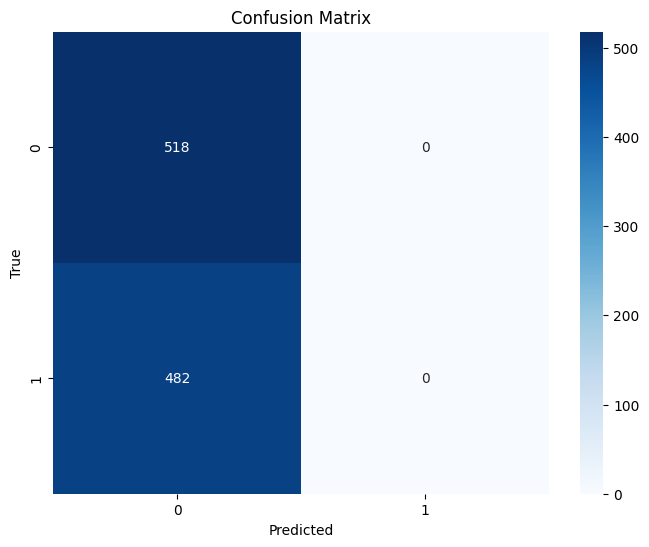

Classification Report:
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       518
           1       0.00      0.00      0.00       482

    accuracy                           0.52      1000
   macro avg       0.26      0.50      0.34      1000
weighted avg       0.27      0.52      0.35      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


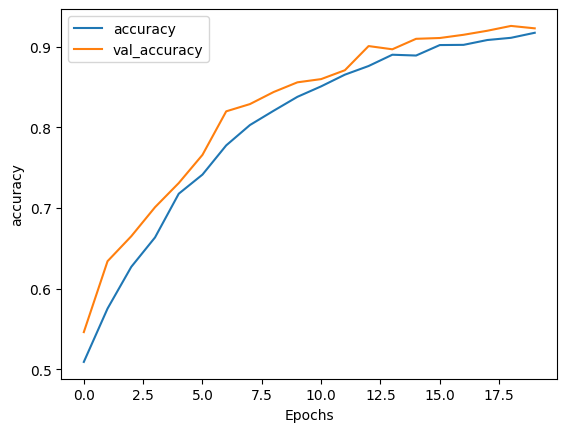

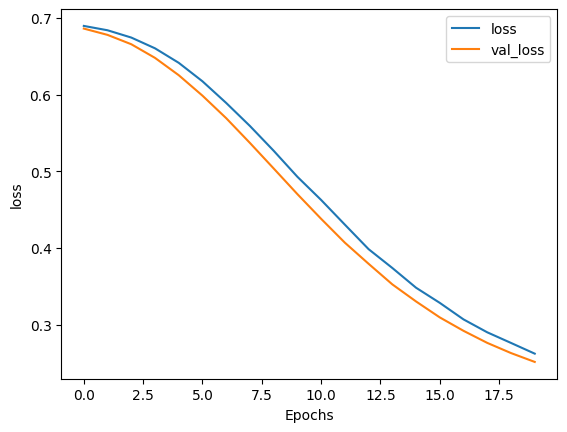

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, f'val_{string}'])
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model.save('spamDetection.h5')

from google.colab import files

files.download('spamDetection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
new_text = "Promo DISKON 60% dari OYO untuk liburan akhir tahun kamu. Tukar 75 poin BonsTri-mu di https://bit.ly/BimaBonstri & nikmati liburan hemat dgn BonsTri."
max_length = X_train.shape[1]
print("Max Length:", max_length)

# Tokenize and pad the new text
new_sequence = tokenizer.texts_to_sequences([new_text])
new_padded_sequence = pad_sequences(new_sequence, maxlen=X_train.shape[1], padding='post')

# Make predictions
prediction = model.predict(new_padded_sequence)

# Extract the scalar value from the NumPy array
confidence = prediction[0, 0]

# Threshold for considering a label as positive
threshold = 0.5

# Interpret prediction
predicted_class = 1 if confidence >= threshold else 0

# Convert confidence to a format that can be handled by format method
confidence_str = '{:.4f}'.format(confidence)

print(f"Predicted Class: {predicted_class} (Confidence: {confidence_str})")

Max Length: 34
1/1 [==============================] - 0s 31ms/step
Predicted Class: 1 (Confidence: 0.5833)
